In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

def get_sin_cos(theta):
    return ( np.sin(theta), np.cos(theta))

def rad2deg(rad):
    return np.array(rad) * (180.0/np.pi)

def deg2rad(deg):
    return np.array(deg) * (np.pi/180.0)

def quaternionFromEuler(attitude_xyz):
    c1 = np.cos( 0.5 * attitude_xyz[0])
    s1 = np.sin( 0.5 * attitude_xyz[0])
    c2 = np.cos( 0.5 * attitude_xyz[1])
    s2 = np.sin( 0.5 * attitude_xyz[1])
    c3 = np.cos( 0.5 * attitude_xyz[2])
    s3 = np.sin( 0.5 * attitude_xyz[2])

    q0 = c1*c2*c3 + s1*s2*s3
    q1 = s1*c2*c3 - c1*s2*s3
    q2 = c1*s2*c3 + s1*c2*s3
    q3 = c1*c2*s3 - s1*s2*c3

    return np.array([q0,q1,q2,q3])


def eulerXYZFromQuaternion(quat):
    q0 = quat[0]
    q1 = quat[1]
    q2 = quat[2]
    q3 = quat[3]

    r11 = q0*q0 + q1*q1 - q2*q2 - q3 * q3
    r12 = 2.0 * (q1*q2 + q0*q3)
    r13 = 2.0 * (q1*q3 - q0*q2)
    r23 = 2.0 * (q2*q3 + q0*q1)
    r33 = q0*q0 - q1*q1 - q2*q2 + q3*q3

    phi = np.arctan2(r23, r33)
    the = -np.arcsin(r13)
    psi = np.arctan2(r12, r11)

    return np.array([phi, the, psi])

def quatNorm(quat):
    q0 = quat[0]
    q1 = quat[1]
    q2 = quat[2]
    q3 = quat[3]
    return np.sqrt(q0 * q0 + q1 * q1 + q2 * q2 + q3 * q3)

def quaternionNormalize(quat):
    norm = quatNorm(quat)
    return quat / norm

def quaternionSLERP(quat1, quat2, t):
    q1 = quaternionNormalize(quat1)
    q2 = quaternionNormalize(quat2)

    dot = np.dot(q1,q2)
    theta = np.arccos(dot)
    a = np.sin( (1-t)* theta) / np.sin(theta) 
    b = np.sin( t*theta / np.sin(theta) )
    qt = a * q1 + b * q2
    return quaternionNormalize(qt)



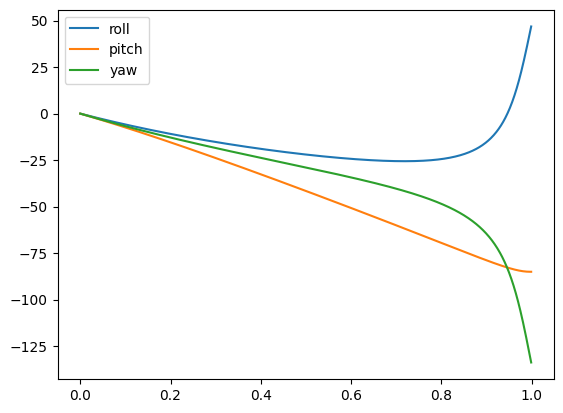

In [3]:
attitude = deg2rad([0,0,0])
attitude2 = deg2rad([48,-85,-135])

q1 = quaternionFromEuler(attitude)
q2 = quaternionFromEuler(attitude2)

param = []
phi = []
the = []
psi = []

for t in np.arange(0, 1, 0.001):
    q = quaternionSLERP(q1, q2, t)
    attitude = eulerXYZFromQuaternion(q)
    param.append(t)
    phi.append(rad2deg(attitude[0]))
    the.append(rad2deg(attitude[1]))
    psi.append(rad2deg(attitude[2]))


plt.plot(param, phi, label="roll")
plt.plot(param, the, label="pitch")
plt.plot(param, psi, label="yaw")
plt.legend()
#plt.savefig("attitude.png")
